In [0]:
from fastai.vision import *
import shutil
import numpy as np
from fastai import *
from pathlib import Path

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/DataFix'
bs = 64
tfms = get_transforms(flip_vert=False, max_warp=0)

data = ImageDataBunch.from_folder(path, 
                                  valid_pct=0.2,
                                  ds_tfms=tfms,
                                  size=224,bs=bs, 
                                  num_workers=0).normalize(imagenet_stats)

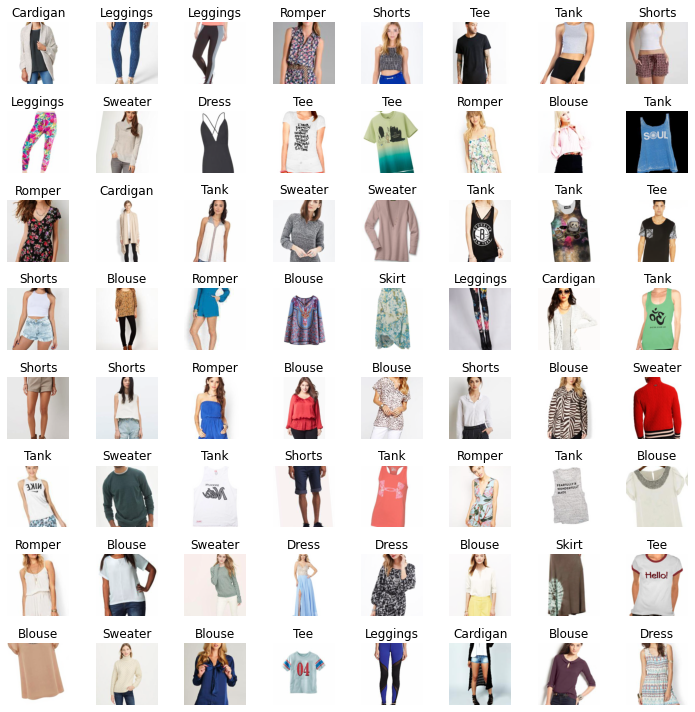

In [8]:
data.show_batch(rows=10, figsize=(10,10))

In [9]:
print(data.classes)
len(data.classes),data.c

['Blouse', 'Cardigan', 'Dress', 'Leggings', 'Romper', 'Shorts', 'Skirt', 'Sweater', 'Tank', 'Tee']


(10, 10)

In [10]:
learner = create_cnn(data, models.resnet34, metrics=error_rate, callback_fns=ShowGraph)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learner.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time


In [0]:
interp = ClassificationInterpretation.from_learner(learner)

In [0]:
interp.plot_confusion_matrix()

In [0]:
learner.save("model")

In [3]:
learner = learner.load("model")

NameError: ignored